# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests , json
import time

# Import API key
import openweathermapy.core as owm
from api_keys import api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
print (cities[1:10])
len(cities)


['saint-philippe', 'bosaso', 'along', 'punta arenas', 'vila franca do campo', 'belushya guba', 'mataura', 'saskylakh', 'bambous virieux']


631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

weather_data_list = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    #response = owm.get_current(city, **settings)
    #weather_data_city_json = response.json()
    if response["cod"] != "404":
        weather_data_list.append(response)
        print(response)
    else: 
        print(" City Not Found ") 
    time.sleep(1)
   

{'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3, 'pressure': 1000, 'humidity': 93, 'temp_min': 3, 'temp_max': 3}, 'wind': {'speed': 7.7, 'deg': 280}, 'rain': {'3h': 1.315}, 'clouds': {'all': 92}, 'dt': 1548294600, 'sys': {'type': 1, 'id': 1596, 'message': 0.0046, 'country': 'FO', 'sunrise': 1548321250, 'sunset': 1548345803}, 'id': 2618795, 'name': 'Klaksvik', 'cod': 200}
{'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 511, 'main': 'Rain', 'description': 'freezing rain', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.8, 'pressure': 1005, 'humidity': 86, 'temp_min': -6, 'temp_max': 2}, 'visibility': 6437, 'wind': {'speed': 8.7, 'deg': 170, 'gust': 11.8}, 'clouds': {'all': 90}, 'dt': 1548296340, 'sys': {'type': 1, 'id': 820, 'message': 0.0039, 'country': 'CA', 'sunrise': 1548332586, 'su

{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 3.51, 'pressure': 1013, 'humidity': 78, 'temp_min': -1, 'temp_max': 6.7}, 'visibility': 14484, 'wind': {'speed': 7.2, 'deg': 180, 'gust': 10.3}, 'rain': {'1h': 1.1}, 'snow': {'1h': 1.78}, 'clouds': {'all': 90}, 'dt': 1548295020, 'sys': {'type': 1, 'id': 3273, 'message': 0.0053, 'country': 'US', 'sunrise': 1548332204, 'sunset': 1548367072}, 'id': 5106834, 'name': 'Albany', 'cod': 200}
{'coord': {'lon': 118.73, 'lat': -8.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.47, 'pressure': 997.24, 'humidity': 80, 'temp_min': 28.47, 'temp_max': 28.47, 'sea_level': 1021.63, 'grnd_level': 997.24}, 'wind': {'speed':

{'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1013, 'humidity': 88, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 0.5}, 'clouds': {'all': 75}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 9372, 'message': 0.0036, 'country': 'BN', 'sunrise': 1548282889, 'sunset': 1548325634}, 'id': 1733782, 'name': 'Victoria', 'cod': 200}
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.02, 'pressure': 1026.5, 'humidity': 100, 'temp_min': 19.02, 'temp_max': 19.02, 'sea_level': 1027.61, 'grnd_level': 1026.5}, 'wind': {'speed': 7.96, 'deg': 202.5}, 'clouds': {'all': 12}, 'dt': 1548297613, 'sys': {'message': 0.0033, 'country': 'AU', 'sunrise': 1548279129, 'sunset': 1548329313}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
{'coord

 City Not Found 
{'coord': {'lon': -6.55, 'lat': 41.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.94, 'pressure': 952.9, 'humidity': 88, 'temp_min': 7.94, 'temp_max': 7.94, 'sea_level': 1027.95, 'grnd_level': 952.9}, 'wind': {'speed': 3.36, 'deg': 309.5}, 'clouds': {'all': 76}, 'dt': 1548297657, 'sys': {'message': 0.0036, 'country': 'PT', 'sunrise': 1548315896, 'sunset': 1548351118}, 'id': 2737599, 'name': 'Saldanha', 'cod': 200}
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1016, 'humidity': 43, 'temp_min': 22, 'temp_max': 22}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 9545, 'message': 0.004, 'country': 'AU', 'sunrise': 1548270078, 'sunset': 1548322997}, 'id': 2163355, 'name': 'Ho

{'coord': {'lon': -0.6, 'lat': 45.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 0.88, 'pressure': 1010, 'humidity': 80, 'temp_min': 0, 'temp_max': 2}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 6452, 'message': 0.0029, 'country': 'FR', 'sunrise': 1548315148, 'sunset': 1548349013}, 'id': 3026644, 'name': 'Souillac', 'cod': 200}
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9, 'pressure': 1015, 'humidity': 87, 'temp_min': 9, 'temp_max': 9}, 'wind': {'speed': 0.96, 'deg': 267.5}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8512, 'message': 0.004, 'country': 'CL', 'sunrise': 1548323257, 'sunset': 1548375961}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
{'coord': {'lon': -8.4, 'lat': 51.89}, 'we

{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -8, 'pressure': 996, 'humidity': 92, 'temp_min': -8, 'temp_max': -8}, 'visibility': 6000, 'wind': {'speed': 13, 'deg': 360}, 'clouds': {'all': 90}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8875, 'message': 0.004, 'country': 'RU', 'sunrise': 1548362325, 'sunset': 1548384733}, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
 City Not Found 
{'coord': {'lon': 97.97, 'lat': 4.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.32, 'pressure': 970.73, 'humidity': 84, 'temp_min': 26.32, 'temp_max': 26.32, 'sea_level': 1026.07, 'grnd_level': 970.73}, 'wind': {'speed': 0.96, 'deg': 356.5}, 'clouds': {'all': 20}, 'dt': 1548297739, 'sys': {'message': 0.0038, 'country': 'ID', 'sunrise': 1548286966, 'sunset': 1548329848}, 'id': 1214724, 'name': 'Langsa

{'coord': {'lon': 27.85, 'lat': 71.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -4.04, 'pressure': 1011.43, 'humidity': 89, 'temp_min': -4.04, 'temp_max': -4.04, 'sea_level': 1031.07, 'grnd_level': 1011.43}, 'wind': {'speed': 4.71, 'deg': 33.0001}, 'clouds': {'all': 48}, 'dt': 1548297780, 'sys': {'message': 0.005, 'country': 'NO', 'sunrise': 1548321642, 'sunset': 1548328893}, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
{'coord': {'lon': -48.67, 'lat': -28.24}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1014, 'humidity': 83, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8360, 'message': 0.003, 'country': 'BR', 'sunrise': 1548319167, 'sunset': 1548368023}, 'id': 3461370, 'name': 'Imbituba'

{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.14, 'pressure': 996.1, 'humidity': 100, 'temp_min': -1.14, 'temp_max': -1.14, 'sea_level': 1009.47, 'grnd_level': 996.1}, 'wind': {'speed': 3.86, 'deg': 80.0001}, 'clouds': {'all': 76}, 'dt': 1548297822, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1548278561, 'sunset': 1548310365}, 'id': 2121385, 'name': 'Severo-Kurilsk', 'cod': 200}
{'coord': {'lon': -36.43, 'lat': -10.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 22.97, 'pressure': 1017.26, 'humidity': 93, 'temp_min': 22.97, 'temp_max': 22.97, 'sea_level': 1027.55, 'grnd_level': 1017.26}, 'wind': {'speed': 2.96, 'deg': 60.5001}, 'clouds': {'all': 20}, 'dt': 1548297824, 'sys': {'message': 0.0036, 'country': 'BR', 'sunrise': 1548317967, 'sunset': 1548363362}, 'id': 3454005,

 City Not Found 
 City Not Found 
{'coord': {'lon': 31.1, 'lat': 29.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.67, 'pressure': 1000.89, 'humidity': 46, 'temp_min': 14.67, 'temp_max': 14.67, 'sea_level': 1021, 'grnd_level': 1000.89}, 'wind': {'speed': 7.76, 'deg': 165}, 'clouds': {'all': 64}, 'dt': 1548297863, 'sys': {'message': 0.0041, 'country': 'EG', 'sunrise': 1548305294, 'sunset': 1548343637}, 'id': 359173, 'name': 'Beni Suef', 'cod': 200}
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1027, 'humidity': 70, 'temp_min': 11, 'temp_max': 11}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 2453, 'message': 0.0033, 'country': 'ET', 'sunrise': 1548301566, 'sunset': 1548343691}, 'id': 344979, 'na

{'coord': {'lon': 16.37, 'lat': 68.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -7, 'pressure': 1016, 'humidity': 52, 'temp_min': -7, 'temp_max': -7}, 'visibility': 10000, 'wind': {'speed': 13.9, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1548296400, 'sys': {'type': 1, 'id': 1614, 'message': 0.0041, 'country': 'NO', 'sunrise': 1548319745, 'sunset': 1548336296}, 'id': 3150002, 'name': 'Kjopsvik', 'cod': 200}
{'coord': {'lon': 54.1, 'lat': 17.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1018, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1548294600, 'sys': {'type': 1, 'id': 7562, 'message': 0.0036, 'country': 'OM', 'sunrise': 1548298584, 'sunset': 1548339298}, 'id': 286621, 'name': 'Salalah', 'cod': 200}
{'coord': {'lon': 

{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.42, 'pressure': 1008.99, 'humidity': 72, 'temp_min': 16.42, 'temp_max': 16.42, 'sea_level': 1023.66, 'grnd_level': 1008.99}, 'wind': {'speed': 10.76, 'deg': 165.5}, 'clouds': {'all': 0}, 'dt': 1548297942, 'sys': {'message': 0.0032, 'country': 'NA', 'sunrise': 1548304016, 'sunset': 1548352533}, 'id': 3355672, 'name': 'Luderitz', 'cod': 200}
{'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29, 'pressure': 1011, 'humidity': 79, 'temp_min': 29, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 9423, 'message': 0.0037, 'country': 'ID', 'sunrise': 1548285939, 'sunset': 1548329725}, 'id': 1633419, 'name': 'Padang', 'cod': 200

{'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.22, 'pressure': 1021.07, 'humidity': 48, 'temp_min': 14.22, 'temp_max': 14.22, 'sea_level': 1032.84, 'grnd_level': 1021.07}, 'wind': {'speed': 3.96, 'deg': 18.0001}, 'clouds': {'all': 0}, 'dt': 1548297986, 'sys': {'message': 0.004, 'country': 'MX', 'sunrise': 1548340001, 'sunset': 1548378608}, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
{'coord': {'lon': 132.48, 'lat': 48.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -14.14, 'pressure': 1021.8, 'humidity': 72, 'temp_min': -14.14, 'temp_max': -14.14, 'sea_level': 1034.84, 'grnd_level': 1021.8}, 'wind': {'speed': 1.46, 'deg': 257}, 'clouds': {'all': 0}, 'dt': 1548297988, 'sys': {'message': 0.0028, 'country': 'RU', 'sunrise': 1548283697, 'sunset': 1548316576}, 'id': 2027277, 'name': '

{'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1015, 'humidity': 74, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1548297000, 'sys': {'type': 1, 'id': 8669, 'message': 0.0034, 'country': 'GF', 'sunrise': 1548323082, 'sunset': 1548365889}, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
{'coord': {'lon': 139.49, 'lat': -20.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39, 'pressure': 1008, 'humidity': 21, 'temp_min': 39, 'temp_max': 39}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 9495, 'message': 0.003, 'country': 'AU', 'sunrise': 1548274775, 'sunset': 1548322090}, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
{'coord': {'lon': 1

{'coord': {'lon': 32.53, 'lat': 34.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1008, 'humidity': 54, 'temp_min': 14, 'temp_max': 14}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 90, 'gust': 12.3}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 6374, 'message': 0.0031, 'country': 'CY', 'sunrise': 1548305632, 'sunset': 1548342616}, 'id': 146639, 'name': 'Lasa', 'cod': 200}
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1013, 'humidity': 88, 'temp_min': 26, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8363, 'message': 0.0049, 'country': 'BR', 'sunrise': 1548319062, 'sunset': 1548363313}, 'id': 6320062, 'name': 'Vila Velha', 'cod': 200}
 City 

 City Not Found 
{'coord': {'lon': -39.11, 'lat': -13.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.12, 'pressure': 1022.86, 'humidity': 89, 'temp_min': 26.12, 'temp_max': 26.12, 'sea_level': 1028.26, 'grnd_level': 1022.86}, 'wind': {'speed': 2.71, 'deg': 94.5001}, 'rain': {'3h': 0.36}, 'clouds': {'all': 92}, 'dt': 1548298110, 'sys': {'message': 0.003, 'country': 'BR', 'sunrise': 1548318297, 'sunset': 1548364316}, 'id': 3468025, 'name': 'Camamu', 'cod': 200}
{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1014, 'humidity': 83, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8452, 'message': 0.0049, 'country': 'BR', 'sunrise': 1548318182, 'sunset': 1548362684},

{'coord': {'lon': 2.16, 'lat': 41.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.01, 'pressure': 1000, 'humidity': 74, 'temp_min': 2, 'temp_max': 4}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 6414, 'message': 0.0036, 'country': 'ES', 'sunrise': 1548313808, 'sunset': 1548349025}, 'id': 3128760, 'name': 'Horta', 'cod': 200}
{'coord': {'lon': -46.05, 'lat': 60.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -22.74, 'pressure': 942.77, 'humidity': 46, 'temp_min': -22.74, 'temp_max': -22.74, 'sea_level': 1019.04, 'grnd_level': 942.77}, 'wind': {'speed': 2.06, 'deg': 2.50006}, 'clouds': {'all': 0}, 'dt': 1548298153, 'sys': {'message': 0.0036, 'country': 'GL', 'sunrise': 1548330113, 'sunset': 1548355883}, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}
{'co

{'coord': {'lon': 112.75, 'lat': 59.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -12.59, 'pressure': 992.94, 'humidity': 68, 'temp_min': -12.59, 'temp_max': -12.59, 'sea_level': 1049.11, 'grnd_level': 992.94}, 'wind': {'speed': 3.66, 'deg': 211}, 'clouds': {'all': 88}, 'dt': 1548298197, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1548291541, 'sunset': 1548318216}, 'id': 2018069, 'name': 'Peleduy', 'cod': 200}
{'coord': {'lon': 14, 'lat': 32.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.87, 'pressure': 976.57, 'humidity': 51, 'temp_min': 9.87, 'temp_max': 9.87, 'sea_level': 1012.47, 'grnd_level': 976.57}, 'wind': {'speed': 10.51, 'deg': 255}, 'clouds': {'all': 0}, 'dt': 1548298199, 'sys': {'message': 0.0031, 'country': 'LY', 'sunrise': 1548309799, 'sunset': 1548347344}, 'id': 2215163, 'name': 'Masallatah'

{'coord': {'lon': 114.56, 'lat': 29.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.57, 'pressure': 987.27, 'humidity': 61, 'temp_min': 10.57, 'temp_max': 10.57, 'sea_level': 1037.44, 'grnd_level': 987.27}, 'wind': {'speed': 1.61, 'deg': 148}, 'clouds': {'all': 0}, 'dt': 1548298237, 'sys': {'message': 0.0031, 'country': 'CN', 'sunrise': 1548285265, 'sunset': 1548323598}, 'id': 1786538, 'name': 'Yining', 'cod': 200}
{'coord': {'lon': 11.3, 'lat': 63.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -9, 'pressure': 1008, 'humidity': 78, 'temp_min': -9, 'temp_max': -9}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1548296400, 'sys': {'type': 1, 'id': 1676, 'message': 0.0033, 'country': 'NO', 'sunrise': 1548317807, 'sunset': 1548340660}, 'id': 3135728, 'name': 'Straumen', 'cod': 200}
{'coord'

{'coord': {'lon': 32.9, 'lat': 24.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.82, 'pressure': 998.86, 'humidity': 86, 'temp_min': 7.82, 'temp_max': 7.82, 'sea_level': 1025.97, 'grnd_level': 998.86}, 'wind': {'speed': 1.21, 'deg': 111.5}, 'clouds': {'all': 0}, 'dt': 1548297989, 'sys': {'message': 0.003, 'country': 'EG', 'sunrise': 1548304344, 'sunset': 1548343720}, 'id': 359792, 'name': 'Aswan', 'cod': 200}
{'coord': {'lon': -76.2, 'lat': 24.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.87, 'pressure': 1033.96, 'humidity': 100, 'temp_min': 24.87, 'temp_max': 24.87, 'sea_level': 1034.07, 'grnd_level': 1033.96}, 'wind': {'speed': 12.11, 'deg': 119.5}, 'clouds': {'all': 68}, 'dt': 1548298280, 'sys': {'message': 0.0034, 'country': 'BS', 'sunrise': 1548330604, 'sunset': 1548369837}, 'id': 3571592, 'name': 'Rock Sound', 

{'coord': {'lon': -54.96, 'lat': -34.91}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1018, 'humidity': 77, 'temp_min': 21, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8712, 'message': 0.0036, 'country': 'UY', 'sunrise': 1548319867, 'sunset': 1548370336}, 'id': 3441894, 'name': 'Maldonado', 'cod': 200}
{'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 8.65, 'pressure': 1013, 'humidity': 26, 'temp_min': 8, 'temp_max': 9}, 'visibility': 10000, 'wind': {'speed': 10.3, 'deg': 330, 'gust': 15.4}, 'clouds': {'all': 20}, 'dt': 1548297000, 'sys': {'type': 1, 'id': 8074, 'message': 0.0037, 'country': 'JP', 'sunrise': 1548280065, 'sunset': 1548316815}, 'id': 1850144, 'name': 'Nishihara',

{'coord': {'lon': 152.44, 'lat': -3.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.22, 'pressure': 1014.75, 'humidity': 97, 'temp_min': 29.22, 'temp_max': 29.22, 'sea_level': 1020.66, 'grnd_level': 1014.75}, 'wind': {'speed': 5.01, 'deg': 261}, 'clouds': {'all': 56}, 'dt': 1548298361, 'sys': {'message': 0.0029, 'country': 'PG', 'sunrise': 1548273206, 'sunset': 1548317454}, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
{'coord': {'lon': -97.96, 'lat': 29.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6.72, 'pressure': 1021, 'humidity': 54, 'temp_min': 5, 'temp_max': 7.8}, 'visibility': 16093, 'wind': {'speed': 1.26, 'deg': 10.5001}, 'clouds': {'all': 1}, 'dt': 1548297300, 'sys': {'type': 1, 'id': 5982, 'message': 0.0036, 'country': 'US', 'sunrise': 1548336315, 'sunset': 1548374575}, 'id': 4727756, 'name': 'Seguin', 'c

{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.69, 'pressure': 1028.94, 'humidity': 96, 'temp_min': 26.69, 'temp_max': 26.69, 'sea_level': 1028.97, 'grnd_level': 1028.94}, 'wind': {'speed': 9.61, 'deg': 41.5001}, 'clouds': {'all': 0}, 'dt': 1548298249, 'sys': {'message': 0.0028, 'country': 'BR', 'sunrise': 1548318035, 'sunset': 1548365504}, 'id': 3448903, 'name': 'Sao Joao da Barra', 'cod': 200}
{'coord': {'lon': 148.01, 'lat': -33.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 32.44, 'pressure': 989.3, 'humidity': 63, 'temp_min': 32.44, 'temp_max': 32.44, 'sea_level': 1025.64, 'grnd_level': 989.3}, 'wind': {'speed': 2.21, 'deg': 40.5001}, 'clouds': {'all': 0}, 'dt': 1548298274, 'sys': {'message': 0.0033, 'country': 'AU', 'sunrise': 1548271319, 'sunset': 1548321444}, 'id': 2166368, 'name

{'coord': {'lon': 39.76, 'lat': 37.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.67, 'pressure': 960.52, 'humidity': 95, 'temp_min': 4.67, 'temp_max': 4.67, 'sea_level': 1034.46, 'grnd_level': 960.52}, 'wind': {'speed': 3.76, 'deg': 78.5001}, 'clouds': {'all': 88}, 'dt': 1548298441, 'sys': {'message': 0.0033, 'country': 'TR', 'sunrise': 1548304196, 'sunset': 1548340583}, 'id': 298033, 'name': 'Viransehir', 'cod': 200}
{'coord': {'lon': -102.08, 'lat': 50.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -17.41, 'pressure': 967.57, 'humidity': 69, 'temp_min': -17.41, 'temp_max': -17.41, 'sea_level': 1041.67, 'grnd_level': 967.57}, 'wind': {'speed': 7.81, 'deg': 331.5}, 'clouds': {'all': 36}, 'dt': 1548298443, 'sys': {'message': 0.0033, 'country': 'CA', 'sunrise': 1548340471, 'sunset': 1548372413}, 'id': 5949563, 

{'coord': {'lon': -119.02, 'lat': 36.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.25, 'pressure': 1027, 'humidity': 75, 'temp_min': 8.6, 'temp_max': 10}, 'visibility': 16093, 'wind': {'speed': 0.91, 'deg': 353.5}, 'clouds': {'all': 1}, 'dt': 1548297300, 'sys': {'type': 1, 'id': 3824, 'message': 0.0032, 'country': 'US', 'sunrise': 1548342135, 'sunset': 1548378870}, 'id': 5384471, 'name': 'Porterville', 'cod': 200}
{'coord': {'lon': 143.23, 'lat': 51.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -8.09, 'pressure': 1021.56, 'humidity': 100, 'temp_min': -8.09, 'temp_max': -8.09, 'sea_level': 1023.94, 'grnd_level': 1021.56}, 'wind': {'speed': 6.01, 'deg': 287.5}, 'clouds': {'all': 88}, 'dt': 1548298484, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1548281885, 'sunset': 1548313231}, 'id': 2122783, 'name': 'Katan

{'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31, 'pressure': 1013, 'humidity': 45, 'temp_min': 31, 'temp_max': 31}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 9501, 'message': 0.0032, 'country': 'AU', 'sunrise': 1548271098, 'sunset': 1548319350}, 'id': 2146219, 'name': 'Hervey Bay', 'cod': 200}
{'coord': {'lon': 145.57, 'lat': 43.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -3, 'pressure': 993, 'humidity': 73, 'temp_min': -3, 'temp_max': -3}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 7976, 'message': 0.0033, 'country': 'JP', 'sunrise': 1548279703, 'sunset': 1548314283}, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
{'coor

{'coord': {'lon': 134.23, 'lat': -12.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.44, 'pressure': 1019.53, 'humidity': 100, 'temp_min': 27.44, 'temp_max': 27.44, 'sea_level': 1019.77, 'grnd_level': 1019.53}, 'wind': {'speed': 2.96, 'deg': 321.5}, 'clouds': {'all': 88}, 'dt': 1548298562, 'sys': {'message': 0.0036, 'country': 'AU', 'sunrise': 1548276850, 'sunset': 1548322546}, 'id': 2067089, 'name': 'Maningrida', 'cod': 200}
 City Not Found 
{'coord': {'lon': 99.94, 'lat': 9.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29, 'pressure': 1015, 'humidity': 79, 'temp_min': 29, 'temp_max': 29}, 'visibility': 9000, 'wind': {'speed': 3.6, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1548297000, 'sys': {'type': 1, 'id': 9273, 'message': 0.0032, 'country': 'TH', 'sunrise': 1548286924, 'sunset': 1548328947}, 'id': 1154689, 'na

{'coord': {'lon': -78.15, 'lat': -10.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.12, 'pressure': 954.68, 'humidity': 85, 'temp_min': 20.12, 'temp_max': 20.12, 'sea_level': 1024.43, 'grnd_level': 954.68}, 'wind': {'speed': 1.36, 'deg': 156}, 'rain': {'3h': 0.145}, 'clouds': {'all': 80}, 'dt': 1548298601, 'sys': {'message': 0.0032, 'country': 'PE', 'sunrise': 1548328012, 'sunset': 1548373345}, 'id': 3939168, 'name': 'Huarmey', 'cod': 200}
{'coord': {'lon': 44.38, 'lat': 33.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6, 'pressure': 1020, 'humidity': 81, 'temp_min': 6, 'temp_max': 6}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 7597, 'message': 0.0031, 'country': 'IQ', 'sunrise': 1548302591, 'sunset': 1548339968}, 'id': 98182, 'name': 'Baghdad', 

{'coord': {'lon': -119.2, 'lat': 34.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.93, 'pressure': 1022, 'humidity': 74, 'temp_min': 12.2, 'temp_max': 17.2}, 'visibility': 16093, 'wind': {'speed': 1.56, 'deg': 281.5}, 'clouds': {'all': 20}, 'dt': 1548295020, 'sys': {'type': 1, 'id': 5118, 'message': 0.0033, 'country': 'US', 'sunrise': 1548341939, 'sunset': 1548379152}, 'id': 5384339, 'name': 'Port Hueneme', 'cod': 200}
{'coord': {'lon': 12.38, 'lat': -5.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 24.42, 'pressure': 1017.67, 'humidity': 98, 'temp_min': 24.42, 'temp_max': 24.42, 'sea_level': 1023.7, 'grnd_level': 1017.67}, 'wind': {'speed': 1.36, 'deg': 167.5}, 'clouds': {'all': 36}, 'dt': 1548298643, 'sys': {'message': 0.0028, 'country': 'CD', 'sunrise': 1548306636, 'sunset': 1548351263}, 'id': 2312393, 'name': 

{'coord': {'lon': 119.94, 'lat': 54.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -19.56, 'pressure': 944.39, 'humidity': 58, 'temp_min': -19.56, 'temp_max': -19.56, 'sea_level': 1050.35, 'grnd_level': 944.39}, 'wind': {'speed': 2.21, 'deg': 356.5}, 'clouds': {'all': 0}, 'dt': 1548298678, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1548288151, 'sunset': 1548318149}, 'id': 2014836, 'name': 'Tupik', 'cod': 200}
{'coord': {'lon': 33.88, 'lat': -24.71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.57, 'pressure': 1015.97, 'humidity': 96, 'temp_min': 24.57, 'temp_max': 24.57, 'sea_level': 1021.85, 'grnd_level': 1015.97}, 'wind': {'speed': 5.91, 'deg': 180}, 'rain': {'3h': 0.745}, 'clouds': {'all': 92}, 'dt': 1548298680, 'sys': {'message': 0.0034, 'country': 'MZ', 'sunrise': 1548299729, 'sunset': 1548347835}, 'id': 10409

{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.03, 'pressure': 1026, 'humidity': 71, 'temp_min': 11, 'temp_max': 13}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 150}, 'clouds': {'all': 1}, 'dt': 1548296100, 'sys': {'type': 1, 'id': 4980, 'message': 0.0034, 'country': 'US', 'sunrise': 1548342902, 'sunset': 1548379497}, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
{'coord': {'lon': 23.67, 'lat': 40.99}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 8.97, 'pressure': 968.87, 'humidity': 100, 'temp_min': 8.97, 'temp_max': 8.97, 'sea_level': 1003.01, 'grnd_level': 968.87}, 'wind': {'speed': 2.61, 'deg': 137}, 'rain': {'3h': 3.51}, 'clouds': {'all': 92}, 'dt': 1548298720, 'sys': {'message': 0.004, 'country': 'GR', 'sunrise': 1548308582, 'sunset': 1548343924}, 'id': 734330, 'name'

{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -23, 'pressure': 1022, 'humidity': 76, 'temp_min': -23, 'temp_max': -23}, 'visibility': 24140, 'wind': {'speed': 1}, 'clouds': {'all': 40}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 986, 'message': 0.0032, 'country': 'CA', 'sunrise': 1548347668, 'sunset': 1548375119}, 'id': 5955902, 'name': 'Fort Nelson', 'cod': 200}
{'coord': {'lon': 24.1, 'lat': 45.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3.72, 'pressure': 957.36, 'humidity': 96, 'temp_min': 3.72, 'temp_max': 3.72, 'sea_level': 1010.64, 'grnd_level': 957.36}, 'wind': {'speed': 5.91, 'deg': 73.0001}, 'rain': {'3h': 1.09}, 'clouds': {'all': 92}, 'dt': 1548298760, 'sys': {'message': 0.0038, 'country': 'RO', 'sunrise': 1548309136, 'sunset': 1548343167}, 'id': 685981, 'name': 'Manta'

{'coord': {'lon': 6.56, 'lat': 53}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': -4.49, 'pressure': 1009, 'humidity': 85, 'temp_min': -5, 'temp_max': -4}, 'visibility': 4800, 'wind': {'speed': 2.1, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1548296940, 'sys': {'type': 1, 'id': 1530, 'message': 0.004, 'country': 'NL', 'sunrise': 1548314966, 'sunset': 1548345764}, 'id': 2759633, 'name': 'Assen', 'cod': 200}
{'coord': {'lon': 138.93, 'lat': 34.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.55, 'pressure': 1012, 'humidity': 100, 'temp_min': 9, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1548295200, 'sys': {'type': 1, 'id': 8070, 'message': 0.0035, 'country': 'JP', 'sunrise': 1548280077, 'sunset': 1548317090}, 'id': 1852357, 'name': 'Shimoda', 'cod': 200}
{'coord': {'lon': 90.21

 City Not Found 
{'coord': {'lon': -53.55, 'lat': -32.68}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.62, 'pressure': 1021.32, 'humidity': 88, 'temp_min': 21.62, 'temp_max': 21.62, 'sea_level': 1030.24, 'grnd_level': 1021.32}, 'wind': {'speed': 4.96, 'deg': 129}, 'clouds': {'all': 92}, 'dt': 1548298847, 'sys': {'message': 0.003, 'country': 'UY', 'sunrise': 1548319815, 'sunset': 1548369714}, 'id': 3440791, 'name': 'Getulio Vargas', 'cod': 200}
{'coord': {'lon': 135.58, 'lat': 62.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -33.96, 'pressure': 1023.34, 'humidity': 47, 'temp_min': -33.96, 'temp_max': -33.96, 'sea_level': 1051.64, 'grnd_level': 1023.34}, 'wind': {'speed': 1.21, 'deg': 223}, 'clouds': {'all': 44}, 'dt': 1548298849, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1548287387, 'sunset': 15483

{'coord': {'lon': 53.58, 'lat': 63.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -20.06, 'pressure': 1008.1, 'humidity': 65, 'temp_min': -20.06, 'temp_max': -20.06, 'sea_level': 1028.66, 'grnd_level': 1008.1}, 'wind': {'speed': 2.76, 'deg': 173.5}, 'clouds': {'all': 48}, 'dt': 1548298887, 'sys': {'message': 0.0037, 'country': 'RU', 'sunrise': 1548307436, 'sunset': 1548330733}, 'id': 468991, 'name': 'Yarega', 'cod': 200}
{'coord': {'lon': -63.87, 'lat': -8.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.97, 'pressure': 1014.59, 'humidity': 89, 'temp_min': 25.97, 'temp_max': 25.97, 'sea_level': 1025.07, 'grnd_level': 1014.59}, 'wind': {'speed': 1.46, 'deg': 340.5}, 'clouds': {'all': 0}, 'dt': 1548298890, 'sys': {'message': 0.0051, 'country': 'BR', 'sunrise': 1548324699, 'sunset': 1548369804}, 'id': 3662762, 'name': 'P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
lat = []
lon =[]
temp = []
validcity =[]
windspeed =[]
cloudiness =[]
humidity =[]
country =[]
dt =[]
for cityitem in weather_data_list:
    validcity.append(cityitem['name'])
    lat.append(cityitem['coord']['lat'])
    lon.append(cityitem['coord']['lon'])
    #temp.append(cityitem['main']['temp_max'])
    fahrenheit_temp = round((cityitem['main']['temp_max'] * 1.8) + 32 ,2)
    temp.append(fahrenheit_temp)
    #windspeed.append(cityitem['wind']['speed'])
    windspeed_mph = round((cityitem['wind']['speed'] * 2.237),2)
    windspeed.append(windspeed_mph)
    cloudiness.append(cityitem['clouds']['all'])
    humidity.append(cityitem['main']['humidity'])
    dt.append(cityitem['dt'])
    country.append(cityitem['sys']['country'])
    


In [94]:
print(len(validcity))
print(len(cloudiness))
print(len(country))
print(len(dt))
print(len(humidity))
print(len(lat))
print(len(lon))
print(len(temp))
print(len(windspeed))

569
569
569
569
569
569
569
569
569


In [101]:
weather_dict = {
    "City": validcity,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":dt,
    "Humidity":humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed":windspeed
}
weather_data = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv("city_weather_data.csv", index=False, header=True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Klaksvik,92,FO,1548294600,93,62.23,-6.59,37.40,17.22
1,Saint-Philippe,90,CA,1548296340,86,45.36,-73.48,35.60,19.46
2,Bosaso,0,SO,1548297104,100,11.28,49.18,73.74,4.16
3,Along,44,IN,1548297105,50,28.17,94.80,59.40,2.04
4,Punta Arenas,75,CL,1548295200,51,-53.16,-70.91,59.00,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

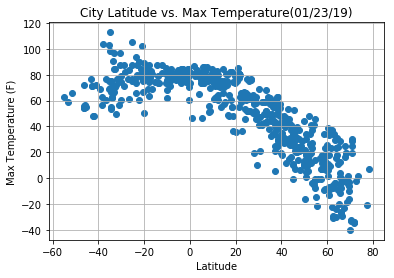

In [96]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/23/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsLatitude.png")

# Show plot
plt.show()

#Latitude vs. Humidity Plot

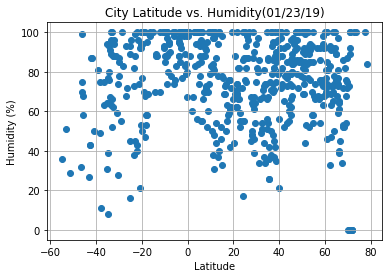

In [97]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/23/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

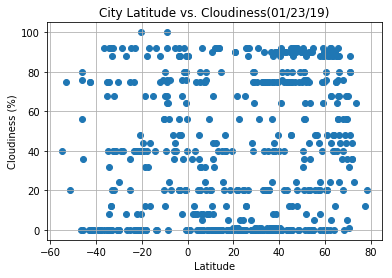

In [98]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(01/23/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvsLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

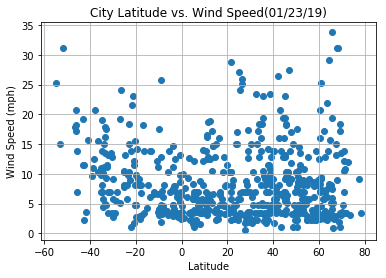

In [99]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(01/23/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windspeedvsLatitude.png")

# Show plot
plt.show()